<a href="https://colab.research.google.com/github/NitheeshMS/Datacleaning_with_PANDAS/blob/main/Week3_Dataset2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd


file_path = '/content/drive/MyDrive/chipotle.tsv'

# Read the TSV file into a DataFrame
chipotle_df = pd.read_csv(file_path, sep='\t')

# Display the first few rows of the DataFrame to verify the data has been loaded successfully
print(chipotle_df.head())


   order_id  quantity                              item_name  \
0         1         1           Chips and Fresh Tomato Salsa   
1         1         1                                   Izze   
2         1         1                       Nantucket Nectar   
3         1         1  Chips and Tomatillo-Green Chili Salsa   
4         2         2                           Chicken Bowl   

                                  choice_description item_price  
0                                                NaN     $2.39   
1                                       [Clementine]     $3.39   
2                                            [Apple]     $3.39   
3                                                NaN     $2.39   
4  [Tomatillo-Red Chili Salsa (Hot), [Black Beans...    $16.98   


In [3]:
import pandas as pd


# Replace 'chipotle.tsv' with the actual path to your TSV file if needed
chipotle_data = pd.read_csv('/content/drive/MyDrive/chipotle.tsv', sep='\t')

# Check for missing values in each column
missing_values = chipotle_data[['order_id', 'quantity', 'item_name', 'choice_description', 'item_price']].isnull().sum()

print("Missing values in each column:")
print(missing_values)


Missing values in each column:
order_id                 0
quantity                 0
item_name                0
choice_description    1246
item_price               0
dtype: int64


In [4]:
chipotle_data['choice_description'].fillna('Not specified', inplace=True)


In [6]:
# Assuming your DataFrame is named df
missing_values = chipotle_data.isnull().sum()

# Display the missing values for each column
print(missing_values)


order_id              0
quantity              0
item_name             0
choice_description    0
item_price            0
dtype: int64


In [8]:
# Display the data types of each column in chipotle_data
print(chipotle_data.dtypes)


order_id               int64
quantity               int64
item_name             object
choice_description    object
item_price            object
dtype: object


In [11]:
chipotle_data['item_price'] = chipotle_data['item_price'].astype(str)
chipotle_data['item_price'] = pd.to_numeric(chipotle_data['item_price'].str.replace('$', '', regex=True), errors='coerce')


In [12]:
chipotle_data.dtypes



order_id                int64
quantity                int64
item_name              object
choice_description     object
item_price            float64
dtype: object

In [13]:
duplicates = chipotle_data[chipotle_data.duplicated()]
print("Duplicated Entries:\n", duplicates)


Duplicated Entries:
       order_id  quantity                            item_name  \
238        103         1                        Steak Burrito   
248        108         1                          Canned Soda   
297        129         1                        Steak Burrito   
381        165         1                    Canned Soft Drink   
484        205         1                         Chicken Bowl   
567        233         1                    Canned Soft Drink   
617        254         1                                Chips   
684        282         1                    Canned Soft Drink   
773        319         1                         Chicken Bowl   
908        376         1                        Steak Burrito   
924        381         1                   Chicken Soft Tacos   
1003       412         1                        Bottled Water   
1117       462         1                      Chicken Burrito   
1203       491         1                      Chicken Burrito   
1245

In [14]:
chipotle_data = chipotle_data.drop_duplicates()


In [15]:
duplicates_after_removal = chipotle_data[chipotle_data.duplicated()]
print("Duplicated Entries After Removal:\n", duplicates_after_removal)


Duplicated Entries After Removal:
 Empty DataFrame
Columns: [order_id, quantity, item_name, choice_description, item_price]
Index: []


In [16]:
# Check the distribution of quantities
quantity_distribution = chipotle_data['quantity'].value_counts()
print(quantity_distribution)


1     4296
2      224
3       28
4       10
5        1
15       1
7        1
8        1
10       1
Name: quantity, dtype: int64


In [17]:
# Display unique values in the "Item Price" column
unique_item_prices = chipotle_data['item_price'].unique()
print(unique_item_prices)


[ 2.39  3.39 16.98 10.98  1.69 11.75  9.25  4.45  8.75 11.25  8.49  2.18
  8.99  1.09  2.95  2.15  3.99 22.5  11.48 17.98 17.5   4.3   5.9   1.25
 23.78  6.49 11.08  1.5  22.16 32.94 22.2  10.58  2.5  23.5   7.4  18.5
  3.    6.78 11.89  9.39  4.    3.75  8.69  2.29  8.9   3.27  3.89  8.19
 35.   27.75 11.8   6.   26.25 21.96  4.36  7.5   4.78 13.35  6.45  5.07
 22.96  7.17  7.98  4.5  26.07 12.98 35.25 44.25 10.5  33.75 16.38 13.52
  5.   15.    8.5  17.8   1.99 11.49]


In [23]:
# Remove '$' from "Item Price" and convert to numeric
chipotle_data['item_price'] = pd.to_numeric(chipotle_data['item_price'].replace('[\$,]', '', regex=True), errors='coerce')

# Display rows with non-numeric "Item Price"
problematic_item_price_rows = chipotle_data[chipotle_data['item_price'].isna()]
print(problematic_item_price_rows[['item_price']])


Empty DataFrame
Columns: [item_price]
Index: []


In [24]:
# Examine the 'Quantity' column
quantity_counts = chipotle_data['quantity'].value_counts()
print(quantity_counts)

# Examine the 'Item Price' column
item_price_stats = chipotle_data['item_price'].describe()
print(item_price_stats)


1     4296
2      224
3       28
4       10
5        1
15       1
7        1
8        1
10       1
Name: quantity, dtype: int64
count    4563.000000
mean        7.490083
std         4.244155
min         1.090000
25%         3.750000
50%         8.750000
75%         9.250000
max        44.250000
Name: item_price, dtype: float64


In [25]:
# Display unique values and their counts in the 'quantity' column
quantity_counts = chipotle_data['quantity'].value_counts()
print(quantity_counts)


1     4296
2      224
3       28
4       10
5        1
15       1
7        1
8        1
10       1
Name: quantity, dtype: int64


In [26]:
# Display summary statistics for "item_price"
item_price_stats = chipotle_data['item_price'].describe()
print(item_price_stats)


count    4563.000000
mean        7.490083
std         4.244155
min         1.090000
25%         3.750000
50%         8.750000
75%         9.250000
max        44.250000
Name: item_price, dtype: float64


In [27]:
# Filter the DataFrame to exclude orders with quantities greater than 2
filtered_chipotle_data = chipotle_data[chipotle_data['quantity'] <= 2]

# Display unique values and their counts in the 'quantity' column after filtering
filtered_quantity_counts = filtered_chipotle_data['quantity'].value_counts()
print(filtered_quantity_counts)


1    4296
2     224
Name: quantity, dtype: int64


In [28]:
# Identify and display rows with item prices outside a certain range (e.g., below $1 or above $20)
outlier_item_prices = chipotle_data[(chipotle_data['item_price'] < 1) | (chipotle_data['item_price'] > 20)]
print(outlier_item_prices[['item_name', 'item_price']])


                         item_name  item_price
135             Chicken Salad Bowl       22.50
213             Chicken Salad Bowl       22.50
281               Steak Salad Bowl       23.78
353                  Steak Burrito       22.16
409                   Chicken Bowl       32.94
445                           Bowl       22.20
506                  Carnitas Bowl       23.50
549                  Steak Burrito       22.16
591             Chicken Salad Bowl       22.50
613               Steak Salad Bowl       23.78
633             Chicken Salad Bowl       22.50
816             Chicken Salad Bowl       22.50
864             Chicken Salad Bowl       22.50
1110            Chicken Salad Bowl       22.50
1254               Chicken Burrito       35.00
1255                 Steak Burrito       27.75
1429                  Chicken Bowl       22.50
1514                  Chicken Bowl       26.25
1566                    Steak Bowl       23.50
1718               Chicken Burrito       21.96
1753         

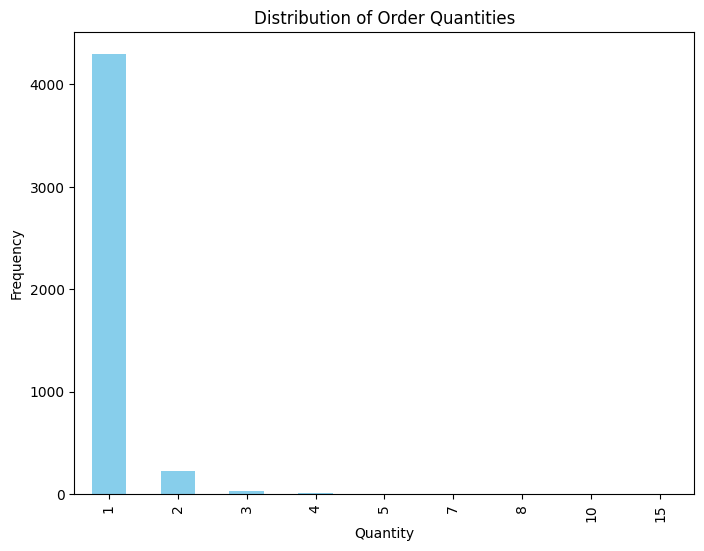

                                item_name  quantity
409                          Chicken Bowl         3
445                                  Bowl         3
689                     Canned Soft Drink         3
818                         Bottled Water         3
850                     Canned Soft Drink         3
917                     Canned Soft Drink         3
1254                      Chicken Burrito         4
1255                        Steak Burrito         3
1257         Chips and Fresh Tomato Salsa         4
1425                        Bottled Water         4
1514                         Chicken Bowl         3
1559                    Canned Soft Drink         3
1880                        Bottled Water         4
2235                          Canned Soda         4
2441                        Bottled Water         5
2645                  Chips and Guacamole         3
2823                        Bottled Water         3
2936                                Chips         3
2944        

In [29]:
import matplotlib.pyplot as plt

# Visualize the distribution of quantities
plt.figure(figsize=(8, 6))
chipotle_data['quantity'].value_counts().sort_index().plot(kind='bar', color='skyblue')
plt.xlabel('Quantity')
plt.ylabel('Frequency')
plt.title('Distribution of Order Quantities')
plt.show()

# Display rows where quantity is greater than 2
high_quantity_orders = chipotle_data[chipotle_data['quantity'] > 2]
print(high_quantity_orders[['item_name', 'quantity']])


In [32]:
import ast

# Extract unique choices from the "Choice Description" column
unique_choices = set()

def extract_choices(choices):
    try:
        return set(ast.literal_eval(choices))
    except (SyntaxError, ValueError):
        return set()

# Apply the function to each row in the "Choice Description" column
chipotle_data['choice_description'].dropna().apply(lambda x: unique_choices.update(extract_choices(x)))

# Create binary columns for each unique choice
for choice in unique_choices:
    chipotle_data[choice] = chipotle_data['choice_description'].apply(lambda x: choice in ast.literal_eval(x) if pd.notna(x) else False)


In [33]:
binary_columns = chipotle_data.apply(lambda x: x.nunique() == 2)

# Display the binary columns
print(binary_columns)


order_id              False
quantity              False
item_name             False
choice_description    False
item_price            False
dtype: bool


In [34]:
# Display the columns of the DataFrame
print(chipotle_data.columns)


Index(['order_id', 'quantity', 'item_name', 'choice_description',
       'item_price'],
      dtype='object')


In [36]:
import string

# Specify the text-based columns you want to check
text_columns = ['item_name', 'choice_description']

# Check for special characters in each text column
for column in text_columns:
    has_special_characters = chipotle_data[column].apply(lambda x: any(char in string.punctuation for char in str(x)))

    # Display rows with special characters in the current column
    rows_with_special_characters = chipotle_data[has_special_characters]
    print(f"Rows with special characters in {column}:")
    print(rows_with_special_characters[[column]])

# If you want to remove special characters, you can use the following code
# Replace special characters with an empty string
chipotle_data[text_columns] = chipotle_data[text_columns].replace('[^\w\s]', '', regex=True)


Rows with special characters in item_name:
                                  item_name
3     Chips and Tomatillo-Green Chili Salsa
15    Chips and Tomatillo-Green Chili Salsa
30    Chips and Tomatillo-Green Chili Salsa
113   Chips and Tomatillo-Green Chili Salsa
133   Chips and Tomatillo-Green Chili Salsa
...                                     ...
3810  Chips and Tomatillo-Green Chili Salsa
3871  Chips and Tomatillo-Green Chili Salsa
3905     Chips and Roasted Chili-Corn Salsa
4007  Chips and Tomatillo-Green Chili Salsa
4088    Chips and Tomatillo-Red Chili Salsa

[68 rows x 1 columns]
Rows with special characters in choice_description:
                                     choice_description
1                                          [Clementine]
2                                               [Apple]
4     [Tomatillo-Red Chili Salsa (Hot), [Black Beans...
5     [Fresh Tomato Salsa (Mild), [Rice, Cheese, Sou...
7     [Tomatillo Red Chili Salsa, [Fajita Vegetables...
...               

In [37]:
import string

# Specify the text-based columns you want to clean
text_columns = ['item_name', 'choice_description']

# Remove special characters from specified text columns
chipotle_data[text_columns] = chipotle_data[text_columns].replace('[^\w\s]', '', regex=True)

# Display the cleaned DataFrame
print(chipotle_data)


      order_id  quantity                             item_name  \
0            1         1          Chips and Fresh Tomato Salsa   
1            1         1                                  Izze   
2            1         1                      Nantucket Nectar   
3            1         1  Chips and TomatilloGreen Chili Salsa   
4            2         2                          Chicken Bowl   
...        ...       ...                                   ...   
4617      1833         1                         Steak Burrito   
4618      1833         1                         Steak Burrito   
4619      1834         1                    Chicken Salad Bowl   
4620      1834         1                    Chicken Salad Bowl   
4621      1834         1                    Chicken Salad Bowl   

                                     choice_description  item_price  
0                                         Not specified        2.39  
1                                            Clementine        3.39

In [38]:
# Check for missing values in the Order ID column
missing_order_ids = chipotle_data['order_id'].isnull().any()

# Check for duplicated Order IDs
duplicated_order_ids = chipotle_data['order_id'].duplicated().any()

# Print the results
print("Missing Order IDs:", missing_order_ids)
print("Duplicated Order IDs:", duplicated_order_ids)


Missing Order IDs: False
Duplicated Order IDs: True


In [39]:
# Display rows with duplicated Order IDs
duplicated_orders = chipotle_data[chipotle_data['order_id'].duplicated(keep=False)]
print(duplicated_orders)


      order_id  quantity                             item_name  \
0            1         1          Chips and Fresh Tomato Salsa   
1            1         1                                  Izze   
2            1         1                      Nantucket Nectar   
3            1         1  Chips and TomatilloGreen Chili Salsa   
5            3         1                          Chicken Bowl   
...        ...       ...                                   ...   
4617      1833         1                         Steak Burrito   
4618      1833         1                         Steak Burrito   
4619      1834         1                    Chicken Salad Bowl   
4620      1834         1                    Chicken Salad Bowl   
4621      1834         1                    Chicken Salad Bowl   

                                     choice_description  item_price  
0                                         Not specified        2.39  
1                                            Clementine        3.39

In [40]:
# Aggregate items by Order ID
aggregated_orders = chipotle_data.groupby('order_id').agg({
    'quantity': 'sum',
    'item_name': ', '.join,
    'choice_description': ', '.join,
    'item_price': 'sum'
}).reset_index()

# Display the first few rows of the aggregated data
print(aggregated_orders.head())


   order_id  quantity                                          item_name  \
0         1         4  Chips and Fresh Tomato Salsa, Izze, Nantucket ...   
1         2         2                                       Chicken Bowl   
2         3         2                        Chicken Bowl, Side of Chips   
3         4         2                    Steak Burrito, Steak Soft Tacos   
4         5         2                 Steak Burrito, Chips and Guacamole   

                                  choice_description  item_price  
0    Not specified, Clementine, Apple, Not specified       11.56  
1  TomatilloRed Chili Salsa Hot Black Beans Rice ...       16.98  
2  Fresh Tomato Salsa Mild Rice Cheese Sour Cream...       12.67  
3  Tomatillo Red Chili Salsa Fajita Vegetables Bl...       21.00  
4  Fresh Tomato Salsa Rice Black Beans Pinto Bean...       13.70  


In [41]:
# Display unique values in the "Item Name" column
unique_item_names = chipotle_data['item_name'].unique()
print(unique_item_names)



['Chips and Fresh Tomato Salsa' 'Izze' 'Nantucket Nectar'
 'Chips and TomatilloGreen Chili Salsa' 'Chicken Bowl' 'Side of Chips'
 'Steak Burrito' 'Steak Soft Tacos' 'Chips and Guacamole'
 'Chicken Crispy Tacos' 'Chicken Soft Tacos' 'Chicken Burrito'
 'Canned Soda' 'Barbacoa Burrito' 'Carnitas Burrito' 'Carnitas Bowl'
 'Bottled Water' 'Chips and Tomatillo Green Chili Salsa' 'Barbacoa Bowl'
 'Chips' 'Chicken Salad Bowl' 'Steak Bowl' 'Barbacoa Soft Tacos'
 'Veggie Burrito' 'Veggie Bowl' 'Steak Crispy Tacos'
 'Chips and Tomatillo Red Chili Salsa' 'Barbacoa Crispy Tacos'
 'Veggie Salad Bowl' 'Chips and Roasted ChiliCorn Salsa'
 'Chips and Roasted Chili Corn Salsa' 'Carnitas Soft Tacos'
 'Chicken Salad' 'Canned Soft Drink' 'Steak Salad Bowl'
 '6 Pack Soft Drink' 'Chips and TomatilloRed Chili Salsa' 'Bowl' 'Burrito'
 'Crispy Tacos' 'Carnitas Crispy Tacos' 'Steak Salad'
 'Chips and Mild Fresh Tomato Salsa' 'Veggie Soft Tacos'
 'Carnitas Salad Bowl' 'Barbacoa Salad Bowl' 'Salad' 'Veggie Crispy 

In [42]:
# Mapping to standardize item names
item_name_mapping = {
    'Chips and TomatilloGreen Chili Salsa': 'Chips and Tomatillo Green Chili Salsa',
    'Chips and Tomatillo Red Chili Salsa': 'Chips and Tomatillo-Red Chili Salsa',
    'Chips and Roasted ChiliCorn Salsa': 'Chips and Roasted Chili Corn Salsa',
    '6 Pack Soft Drink': 'Canned Soft Drink',
    'Bowl': 'Side of Chips',  # Adjust this mapping based on your preference
    'Burrito': 'Chicken Burrito',  # Adjust this mapping based on your preference
    'Crispy Tacos': 'Chicken Crispy Tacos',  # Adjust this mapping based on your preference
    # Add more mappings as needed
}

# Standardize the "Item Name" column
chipotle_data['item_name'] = chipotle_data['item_name'].replace(item_name_mapping)


In [43]:
# Check unique values in the "Item Name" column
unique_item_names = chipotle_data['item_name'].unique()
print(unique_item_names)


['Chips and Fresh Tomato Salsa' 'Izze' 'Nantucket Nectar'
 'Chips and Tomatillo Green Chili Salsa' 'Chicken Bowl' 'Side of Chips'
 'Steak Burrito' 'Steak Soft Tacos' 'Chips and Guacamole'
 'Chicken Crispy Tacos' 'Chicken Soft Tacos' 'Chicken Burrito'
 'Canned Soda' 'Barbacoa Burrito' 'Carnitas Burrito' 'Carnitas Bowl'
 'Bottled Water' 'Barbacoa Bowl' 'Chips' 'Chicken Salad Bowl' 'Steak Bowl'
 'Barbacoa Soft Tacos' 'Veggie Burrito' 'Veggie Bowl' 'Steak Crispy Tacos'
 'Chips and Tomatillo-Red Chili Salsa' 'Barbacoa Crispy Tacos'
 'Veggie Salad Bowl' 'Chips and Roasted Chili Corn Salsa'
 'Carnitas Soft Tacos' 'Chicken Salad' 'Canned Soft Drink'
 'Steak Salad Bowl' 'Chips and TomatilloRed Chili Salsa'
 'Carnitas Crispy Tacos' 'Steak Salad' 'Chips and Mild Fresh Tomato Salsa'
 'Veggie Soft Tacos' 'Carnitas Salad Bowl' 'Barbacoa Salad Bowl' 'Salad'
 'Veggie Crispy Tacos' 'Veggie Salad' 'Carnitas Salad']


In [44]:
# Step 1: Create a new column for Total Price
chipotle_data['Total Price'] = chipotle_data['quantity'] * chipotle_data['item_price']

# Step 2: Examine the statistical summary of the Total Price column
total_price_summary = chipotle_data['Total Price'].describe()

# Step 3: Display the Total Price column and check for any unexpected values
print(chipotle_data[['quantity', 'item_price', 'Total Price']])
print("\nStatistical Summary of Total Price:")
print(total_price_summary)


      quantity  item_price  Total Price
0            1        2.39         2.39
1            1        3.39         3.39
2            1        3.39         3.39
3            1        2.39         2.39
4            2       16.98        33.96
...        ...         ...          ...
4617         1       11.75        11.75
4618         1       11.75        11.75
4619         1       11.25        11.25
4620         1        8.75         8.75
4621         1        8.75         8.75

[4563 rows x 3 columns]

Statistical Summary of Total Price:
count    4563.000000
mean        8.528185
std        12.701196
min         1.090000
25%         3.990000
50%         8.750000
75%        10.980000
max       663.750000
Name: Total Price, dtype: float64


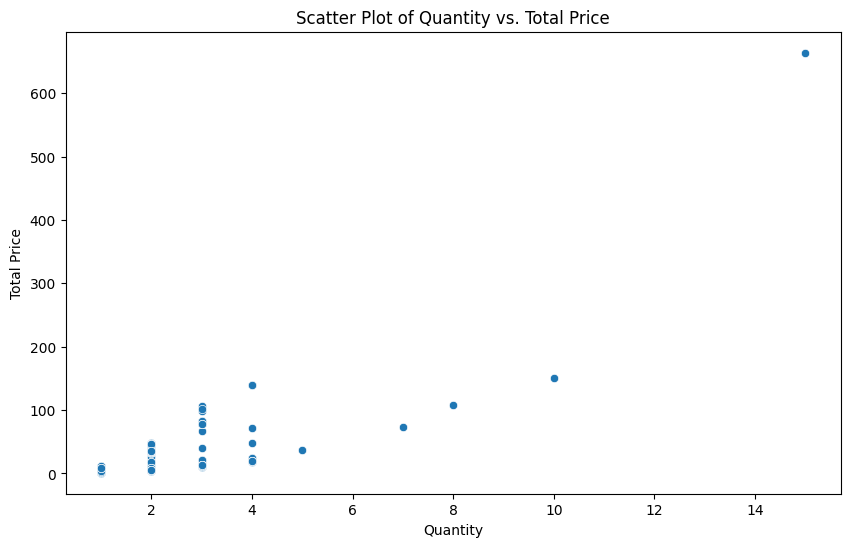

In [45]:
import matplotlib.pyplot as plt
import seaborn as sns

# Scatter plot of Quantity vs. Total Price
plt.figure(figsize=(10, 6))
sns.scatterplot(x='quantity', y='Total Price', data=chipotle_data)
plt.title('Scatter Plot of Quantity vs. Total Price')
plt.xlabel('Quantity')
plt.ylabel('Total Price')
plt.show()


In [46]:
# Calculate the actual total price based on quantity and item price
chipotle_data['Actual Total Price'] = chipotle_data['quantity'] * chipotle_data['item_price']

# Check for discrepancies between calculated and actual total price
discrepancies = chipotle_data[chipotle_data['Total Price'] != chipotle_data['Actual Total Price']]

# Display rows with discrepancies
print("Rows with Discrepancies:")
print(discrepancies[['quantity', 'item_price', 'Total Price', 'Actual Total Price']])



Rows with Discrepancies:
Empty DataFrame
Columns: [quantity, item_price, Total Price, Actual Total Price]
Index: []


In [48]:
# Assuming your cleaned dataset is stored in the variable chipotle_data
chipotle_data.to_csv('cleaned_chipotle_data.csv', sep=',', index=False)


In [49]:
# Assuming 'item_name' is the categorical column in your dataset
# If you have multiple categorical columns, you can repeat the process for each one

# Perform one-hot encoding
encoded_chipotle_data = pd.get_dummies(chipotle_data, columns=['item_name'])

# Display the first few rows of the encoded dataset
print(encoded_chipotle_data.head())


   order_id  quantity                                 choice_description  \
0         1         1                                      Not specified   
1         1         1                                         Clementine   
2         1         1                                              Apple   
3         1         1                                      Not specified   
4         2         2  TomatilloRed Chili Salsa Hot Black Beans Rice ...   

   item_price  Total Price  Actual Total Price  item_name_Barbacoa Bowl  \
0        2.39         2.39                2.39                        0   
1        3.39         3.39                3.39                        0   
2        3.39         3.39                3.39                        0   
3        2.39         2.39                2.39                        0   
4       16.98        33.96               33.96                        0   

   item_name_Barbacoa Burrito  item_name_Barbacoa Crispy Tacos  \
0                         